# ATP Tennis Data - Player Diff Stats with Symmetric Data


In our previous notebook, we ran our models using dataset where we diff'd player stats as features instead. In this notebook, we will use a similar dataset, but for each match, we have split the data into 2 rows where player 1 and player 2's order or switched so that we have 1 row where player 1 is the winner of the match, and another row player 2 is the winner of the match. We will run this dataset through to see if our model performance will improved.

When we did this for raw data, we saw the same or slight decrease in accuracy or no. I suspect we will see similar results here


# Best Results from our last notebook (Gradient Boosting)
```
Model Score: 0.6826468602295747

ROC/AUC Score: 0.682614201415636
              precision    recall  f1-score   support

        Loss       0.68      0.67      0.68      7381
         Win       0.68      0.69      0.69      7429

    accuracy                           0.68     14810
   macro avg       0.68      0.68      0.68     14810
weighted avg       0.68      0.68      0.68     14810
```

# Summary of Results

Again, running this data set, gave us slightly worse performance on all models except for Decision Tree. This tells us that creating features using this method adds little or almost no value to our models.

```
Model Score: 0.6569209993247805

ROC/AUC Score: 0.656920207950288
              precision    recall  f1-score   support

        Loss       0.66      0.66      0.66     14815
         Win       0.66      0.65      0.66     14805

    accuracy                           0.66     29620
   macro avg       0.66      0.66      0.66     29620
weighted avg       0.66      0.66      0.66     29620
```


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, LABEL_COL, RSTATE, N_JOBS, MAX_ITER

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d %H:%m'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "diff-sym"


# update this
FEATURE_FILE = f'../datasets/atp_matches_1985-2019_featuressym-diff.csv'

START_YEAR = 1998
END_YEAR = 2018



In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR)

# Logistic Regression

In [3]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_lr = lr.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

Model Score: 0.6511816340310601

ROC/AUC Score: 0.6511812067394751
              precision    recall  f1-score   support

        Loss       0.65      0.65      0.65     14815
         Win       0.65      0.65      0.65     14805

    accuracy                           0.65     29620
   macro avg       0.65      0.65      0.65     29620
weighted avg       0.65      0.65      0.65     29620

      Loss   Win
Loss  9666  5149
Win   5183  9622


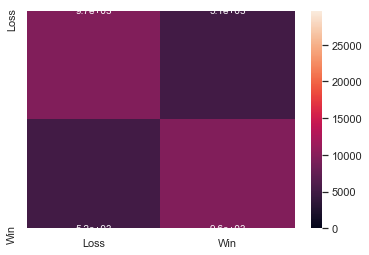

In [4]:
lr.analyze()

In [5]:
# ju.plot_2d(X_test, y_predict_lr)

In [6]:
lr.save()

Saving report: ../reports/summary.csv


# KNN

In [7]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_knn = knn.predict()

Model Score: 0.5980081026333558

ROC/AUC Score: 0.5980069740009708
              precision    recall  f1-score   support

        Loss       0.60      0.60      0.60     14815
         Win       0.60      0.59      0.60     14805

    accuracy                           0.60     29620
   macro avg       0.60      0.60      0.60     29620
weighted avg       0.60      0.60      0.60     29620

      Loss   Win
Loss  8909  5906
Win   6001  8804


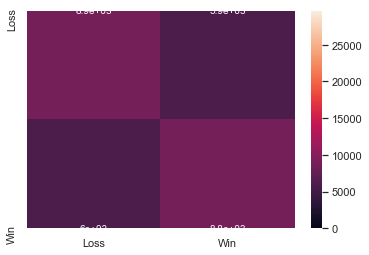

In [8]:
knn.analyze()

In [9]:
# ju.plot_2d(X_test, y_predict_knn)

In [10]:
knn.save()

Saving report: ../reports/summary.csv


# Decision Tree

In [11]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_dt = dt.predict()

Model Score: 0.5775827143821742

ROC/AUC Score: 0.5775832817287353
              precision    recall  f1-score   support

        Loss       0.58      0.58      0.58     14815
         Win       0.58      0.58      0.58     14805

    accuracy                           0.58     29620
   macro avg       0.58      0.58      0.58     29620
weighted avg       0.58      0.58      0.58     29620

      Loss   Win
Loss  8532  6283
Win   6229  8576


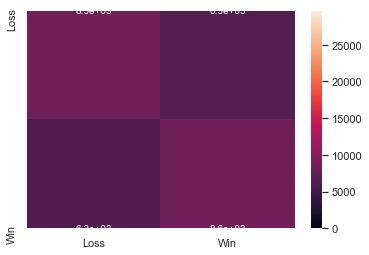

In [12]:
dt.analyze()

In [13]:
# ju.plot_2d(X_test, y_predict_dt)

In [14]:
dt.save()

Saving report: ../reports/summary.csv


# Random Forest Classifier

In [15]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_rf = rf.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


Model Score: 0.6228224172856178

ROC/AUC Score: 0.6227984156277073
              precision    recall  f1-score   support

        Loss       0.61      0.69      0.65     14815
         Win       0.64      0.55      0.59     14805

    accuracy                           0.62     29620
   macro avg       0.63      0.62      0.62     29620
weighted avg       0.63      0.62      0.62     29620

       Loss   Win
Loss  10280  4535
Win    6637  8168


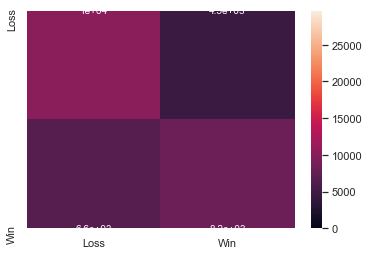

In [16]:
rf.analyze()

In [17]:
# ju.plot_2d(X_test, y_predict_rf)

In [18]:
rf.save()

Saving report: ../reports/summary.csv


# Gradient Boosting

In [19]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3644           13.57s
         2           1.3465           13.34s
         3           1.3320           12.96s
         4           1.3199           12.85s
         5           1.3100           12.18s
         6           1.3018           11.30s
         7           1.2948           10.53s
         8           1.2891            9.92s
         9           1.2842            9.41s
        10           1.2799            9.03s
        20           1.2601            8.59s
        30           1.2528            7.20s
        40           1.2478            5.94s
        50           1.2442            4.69s
        60           1.2411            3.53s
        70           1.2389            2.51s
        80           1.2365            1.62s
        90           1.2344            0.78s
       100           1.2321            0.00s


Model Score: 0.6569209993247805

ROC/AUC Score: 0.656920207950288
              precision    recall  f1-score   support

        Loss       0.66      0.66      0.66     14815
         Win       0.66      0.65      0.66     14805

    accuracy                           0.66     29620
   macro avg       0.66      0.66      0.66     29620
weighted avg       0.66      0.66      0.66     29620

      Loss   Win
Loss  9767  5048
Win   5114  9691


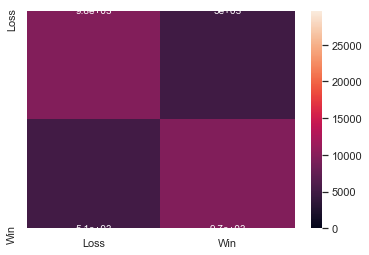

In [20]:
gb.analyze()

In [21]:
# ju.plot_2d(X_test, y_predict_gb)

In [22]:
gb.save()

Saving report: ../reports/summary.csv


# AdaBoost

In [23]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_ab = ab.predict()

Model Score: 0.6524645509790682

ROC/AUC Score: 0.6524642378140486
              precision    recall  f1-score   support

        Loss       0.65      0.65      0.65     14815
         Win       0.65      0.65      0.65     14805

    accuracy                           0.65     29620
   macro avg       0.65      0.65      0.65     29620
weighted avg       0.65      0.65      0.65     29620

      Loss   Win
Loss  9680  5135
Win   5159  9646


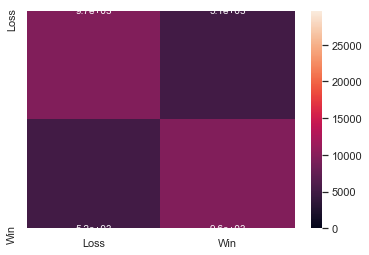

In [24]:
ab.analyze()

In [25]:
# ju.plot_2d(X_test, y_predict_ab)

In [26]:
ab.save()

Saving report: ../reports/summary.csv


# Summary

Decision Tree Classifier did the best with a 92% accuracy score while KNN did the worst at about 60% (below our null hypothesis)

In [27]:
report = pd.read_csv(ab.report_file)
report[report.description == DESCRIPTION]

,model_name,description,data_file,start_year,end_year,accuracy,roc_auc_score,confusion_matrix,classification_report,model_file,predict_time_min,fit_time_min,total_time_min
24,LogisticRegression,diff-sym,../datasets/atp_matches_1985-2019_featuressym-...,1998,2018,0.651182,0.651181,"{""0"": {""0"": 9666, ""1"": 5183}, ""1"": {""0"": 5149,...","{""Loss"": {""precision"": 0.6509529261229713, ""re...",../models/logisticregression-1998-2018-diff-sy...,0.0,0.0,0.0
25,KNeighborsClassifier,diff-sym,../datasets/atp_matches_1985-2019_featuressym-...,1998,2018,0.598008,0.598007,"{""0"": {""0"": 8909, ""1"": 6001}, ""1"": {""0"": 5906,...","{""Loss"": {""precision"": 0.5975184439973172, ""re...",../models/kneighborsclassifier-1998-2018-diff-...,0.0,0.0,0.0
26,DecisionTreeClassifier,diff-sym,../datasets/atp_matches_1985-2019_featuressym-...,1998,2018,0.577583,0.577583,"{""0"": {""0"": 8532, ""1"": 6229}, ""1"": {""0"": 6283,...","{""Loss"": {""precision"": 0.5780096199444482, ""re...",../models/decisiontreeclassifier-1998-2018-dif...,0.0,0.0,0.0
27,RandomForestClassifier,diff-sym,../datasets/atp_matches_1985-2019_featuressym-...,1998,2018,0.622822,0.622798,"{""0"": {""0"": 10280, ""1"": 6637}, ""1"": {""0"": 4535...","{""Loss"": {""precision"": 0.607672755216646, ""rec...",../models/randomforestclassifier-1998-2018-dif...,0.0,0.0,0.0
28,GradientBoostingClassifier,diff-sym,../datasets/atp_matches_1985-2019_featuressym-...,1998,2018,0.656921,0.656920,"{""0"": {""0"": 9767, ""1"": 5114}, ""1"": {""0"": 5048,...","{""Loss"": {""precision"": 0.6563402997110409, ""re...",../models/gradientboostingclassifier-1998-2018...,0.0,0.0,0.0
29,AdaBoostClassifier,diff-sym,../datasets/atp_matches_1985-2019_featuressym-...,1998,2018,0.652465,0.652464,"{""0"": {""0"": 9680, ""1"": 5159}, ""1"": {""0"": 5135,...","{""Loss"": {""precision"": 0.6523350630096367, ""re...",../models/adaboostclassifier-1998-2018-diff-sy...,0.0,0.0,0.0


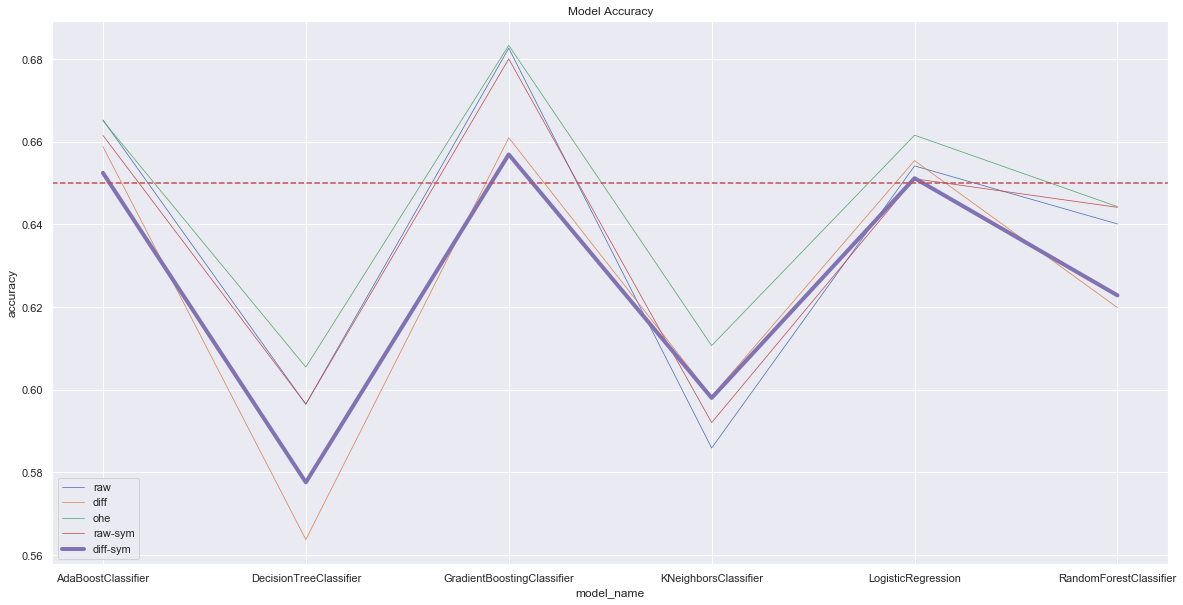

In [28]:
f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

In [29]:
best_model = report.loc[report[report.description == DESCRIPTION].accuracy.idxmax()].model_name
print(f'Best Model: {best_model}')
current_report = report[(report.model_name == best_model) &
                                  (report.description == DESCRIPTION)]
mw = ModelWrapper.get_model_wrapper_from_report(current_report)


Best Model: GradientBoostingClassifier


In [30]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(mw.model, data=X_train.values)
shap_values = explainer.shap_values(X_test.values)

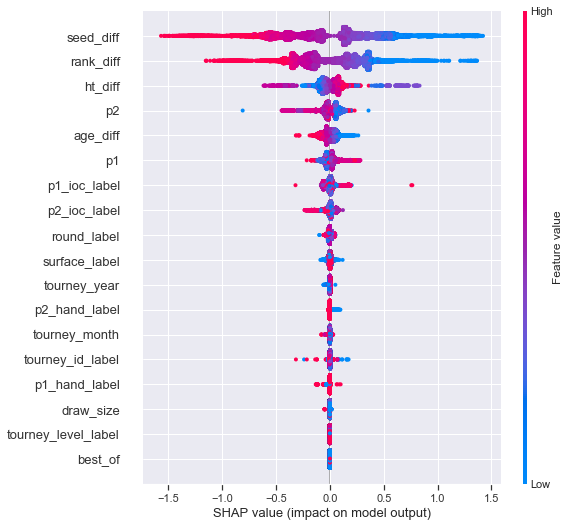

In [31]:
shap.summary_plot(shap_values, X_test, max_display=30)

In [32]:
print(f'Last Finished: {datetime.now().strftime("%Y-%m-%d %H:%M")}')

Last Finished: 2019-10-20 22:38
